In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

In [33]:
# Load the data
df = pd.read_csv('data.csv')
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [35]:
# Exploratory Data Analysis (EDA)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB
None


In [37]:
print(df.isnull().sum())

Class Index    0
Title          0
Description    0
dtype: int64


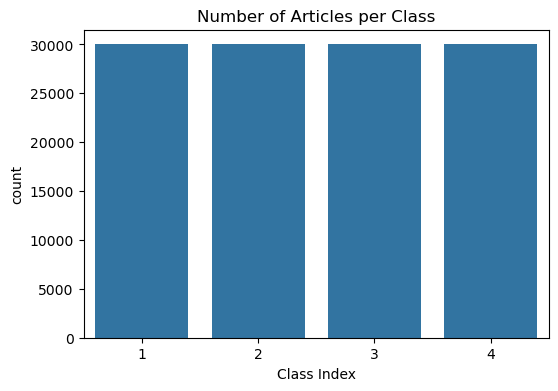

In [39]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class Index', data=df)
plt.title('Number of Articles per Class')
plt.show()

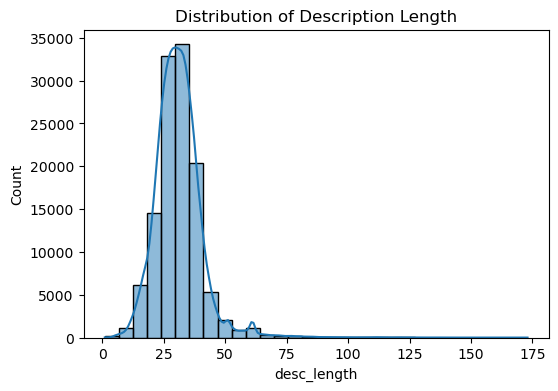

In [41]:
# Description length
df['desc_length'] = df['Description'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.histplot(df['desc_length'], bins=30, kde=True)
plt.title('Distribution of Description Length')
plt.show()

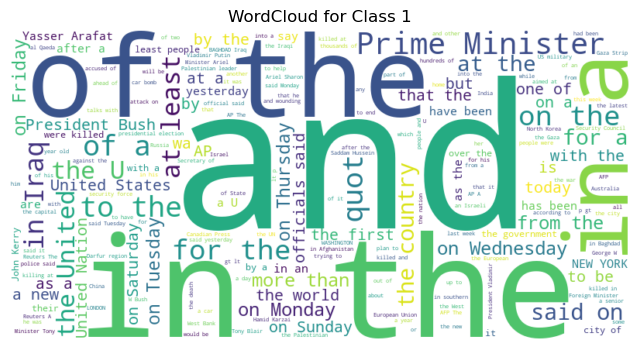

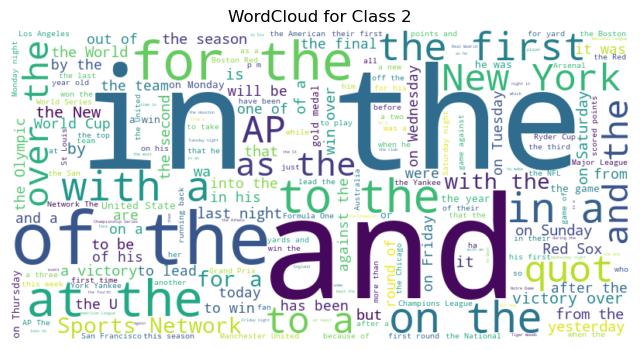

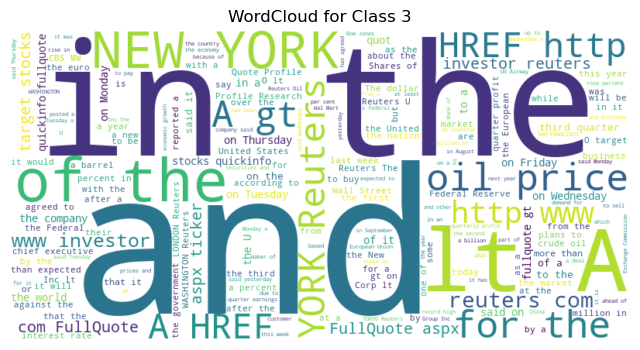

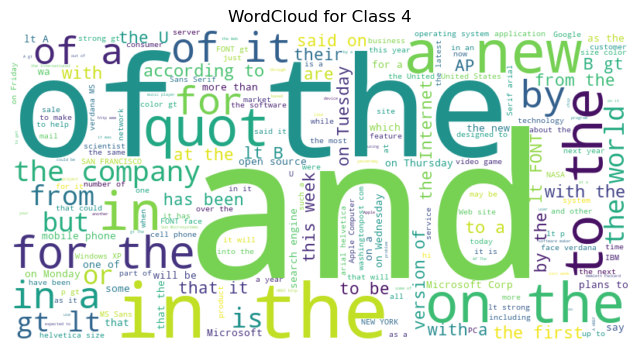

In [43]:
# WordClouds for each class
for class_idx in sorted(df['Class Index'].unique()):
    text = " ".join(df[df['Class Index'] == class_idx]['Description'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Class {class_idx}')
    plt.show()

In [45]:
# Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_desc'] = df['Description'].apply(preprocess)
df.head()

,Class Index,Title,Description,desc_length,clean_desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",12,reuter shortsel wall street dwindlingband ultr...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,30,reuter privat invest firm carlyl groupwhich re...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,29,reuter soar crude price plu worriesabout econo...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,27,reuter author halt oil exportflow main pipelin...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",24,afp tearaway world oil price toppl record stra...


In [47]:
# Simulate User Interaction Data
# Simulate 10 users and random interactions

users = [f'user_{i}' for i in range(1, 11)]
articles = df.index.tolist()

interaction_data = []
for user in users:
    clicked_articles = random.sample(articles, k=random.randint(10, 30))
    for article_id in clicked_articles:
        interaction_data.append({'user_id': user, 'article_id': article_id, 'interaction': 1})

interactions_df = pd.DataFrame(interaction_data)
print(interactions_df.head())

  user_id  article_id  interaction
0  user_1       33214            1
1  user_1       27806            1
2  user_1      109038            1
3  user_1       32381            1
4  user_1       88601            1


In [49]:
# Collaborative Filtering (User-Item Matrix)
from scipy.sparse import csr_matrix

In [51]:
# Create user-item matrix
user_item_matrix = interactions_df.pivot_table(index='user_id', columns='article_id', values='interaction').fillna(0)
user_item_sparse = csr_matrix(user_item_matrix.values)

In [53]:
# Use cosine similarity between users
user_sim = cosine_similarity(user_item_sparse)
user_sim_df = pd.DataFrame(user_sim, index=user_item_matrix.index, columns=user_item_matrix.index)
print(user_sim_df)

user_id  user_1  user_10  user_2  user_3  user_4  user_5  user_6  user_7  \
user_id                                                                    
user_1      1.0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
user_10     0.0      1.0     0.0     0.0     0.0     0.0     0.0     0.0   
user_2      0.0      0.0     1.0     0.0     0.0     0.0     0.0     0.0   
user_3      0.0      0.0     0.0     1.0     0.0     0.0     0.0     0.0   
user_4      0.0      0.0     0.0     0.0     1.0     0.0     0.0     0.0   
user_5      0.0      0.0     0.0     0.0     0.0     1.0     0.0     0.0   
user_6      0.0      0.0     0.0     0.0     0.0     0.0     1.0     0.0   
user_7      0.0      0.0     0.0     0.0     0.0     0.0     0.0     1.0   
user_8      0.0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   
user_9      0.0      0.0     0.0     0.0     0.0     0.0     0.0     0.0   

user_id  user_8  user_9  
user_id                  
user_1      0.0     0.0  
user_10  

In [55]:
# Content-Based Embedding (TF-IDF + Cosine)

In [57]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['clean_desc'])

In [59]:
# Function to recommend articles based on content
def recommend_content_based(article_idx, top_n=5):
    sim_scores = cosine_similarity(tfidf_matrix[article_idx], tfidf_matrix).flatten()
    top_indices = sim_scores.argsort()[-top_n-1:-1][::-1]
    return df.iloc[top_indices][['Title', 'Description']]

In [61]:
# Example:
print("\nExample content-based recommendations:")
recommend_content_based(0)


Example content-based recommendations:


,Title,Description
9,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."
117730,Regulators Probing Tips on Offerings -WSJ,NEW YORK (Reuters) - U.S. regulators are look...
8099,Google critics wrong to label IPO quot;disast...,"In terms of herd behavior, the only group that..."
59700,Allstate Sees Q3 Well Below Views,Allstate Corp. on Wednesday warned its third-q...
89759,StocksView: Retail Spurs Wall St. Upturn (Reut...,Reuters - It's beginning to look a lot like\Ch...


In [63]:
# Personalized Recommendation Function

def personalized_recommendation(user_id, top_n=5):
    # Get similar users
    sim_users = user_sim_df[user_id].sort_values(ascending=False)[1:3].index.tolist()
    
    # Articles clicked by similar users
    articles_clicked = interactions_df[interactions_df['user_id'].isin(sim_users)]['article_id'].value_counts()
    
    # Get top articles not yet seen by the current user
    user_seen = interactions_df[interactions_df['user_id'] == user_id]['article_id'].tolist()
    recommendations = [idx for idx in articles_clicked.index if idx not in user_seen]
    
    top_articles = recommendations[:top_n]
    
    return df.iloc[top_articles][['Title', 'Description']]

In [65]:
# Example
print("\nExample personalized recommendation for user_1:")
personalized_recommendation('user_1')


Example personalized recommendation for user_1:


,Title,Description
82455,Philippines Rushes Relief to Flooded Areas (Re...,"Reuters - Philippine soldiers\rushed food, dri..."
79585,"Kidd, Houston start season on injured list","When the NBA season tips off, the New Jersey N..."
53531,Columnists: Fueling the Fire,The latest Symantec Threat Report can provide ...
48887,Virus found in a dog for first time,Asia #39;s deadly bird flu has been found in a...
68459,Google's earnings more than double,"Web search provider Google Inc., posting its f..."


In [67]:
# Visualize Recommendations

user_id = 'user_1'
recs = personalized_recommendation(user_id, top_n=5)
print("\nTop 5 recommendations for", user_id)
for idx, row in recs.iterrows():
    print(f"{idx+1}. {row['Title']}\n{row['Description'][:200]}...\n")


Top 5 recommendations for user_1
82456. Philippines Rushes Relief to Flooded Areas (Reuters)
Reuters - Philippine soldiers\rushed food, drinking water and other supplies by foot and\helicopters on Sunday to provinces cut off by four storms in\two weeks that left more than 1,300 people dead or...

79586. Kidd, Houston start season on injured list
When the NBA season tips off, the New Jersey Nets will be without All-Star Jason Kidd, and Allan Houston of the New York Knicks will be on the injured list, too....

53532. Columnists: Fueling the Fire
The latest Symantec Threat Report can provide us with information, knowledge, and even a little bit of wisdom -- about what has truly become an epidemic and an avenue for organized crime....

48888. Virus found in a dog for first time
Asia #39;s deadly bird flu has been found in a dog for the first time in Thailand, authorities said yesterday, as the country battles a second major outbreak of the virus this year....

68460. Google's earnings mor

In [69]:
# Example
print("\nExample personalized recommendation for user_3:")
personalized_recommendation('user_3')


Example personalized recommendation for user_3:


,Title,Description
33214,Primary race in Cup Chase won by Busch,"LOUDON, N.H. -- In a year of sweeping changes ..."
79352,Nigerian Oil Unions Take on Shell,"LAGOS, Nigeria - Oil giant Royal Dutch/Shell G..."
49023,New England Patriots Win 18th Straight (AP),AP - Five NFL teams haven't lost this season. ...
79912,Dealing Unit becomes more likely,Still five months shy of opening up their eigh...
80449,Players attack Bettman,NHL commissioner Gary Bettman has come in for ...


In [71]:
# Example
print("\nExample personalized recommendation for user_5:")
personalized_recommendation('user_5')


Example personalized recommendation for user_5:


,Title,Description
33214,Primary race in Cup Chase won by Busch,"LOUDON, N.H. -- In a year of sweeping changes ..."
79352,Nigerian Oil Unions Take on Shell,"LAGOS, Nigeria - Oil giant Royal Dutch/Shell G..."
49023,New England Patriots Win 18th Straight (AP),AP - Five NFL teams haven't lost this season. ...
79912,Dealing Unit becomes more likely,Still five months shy of opening up their eigh...
80449,Players attack Bettman,NHL commissioner Gary Bettman has come in for ...
